# EDA анализ trashnet

In [2]:
!pip install datasets

In [8]:
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from PIL import Image

In [4]:
ds_t = load_dataset("garythung/trashnet")

In [57]:
# Просматриваем общую информацию о датасете
print(ds_t)

# Список классов
class_names = df['train'].features['label'].names
print("\nКлассы в датасете:", class_names)

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 5054
    })
})

Классы в датасете: ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']


### 1. Баланс датасета. График покажет количество изображений в каждом классе.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


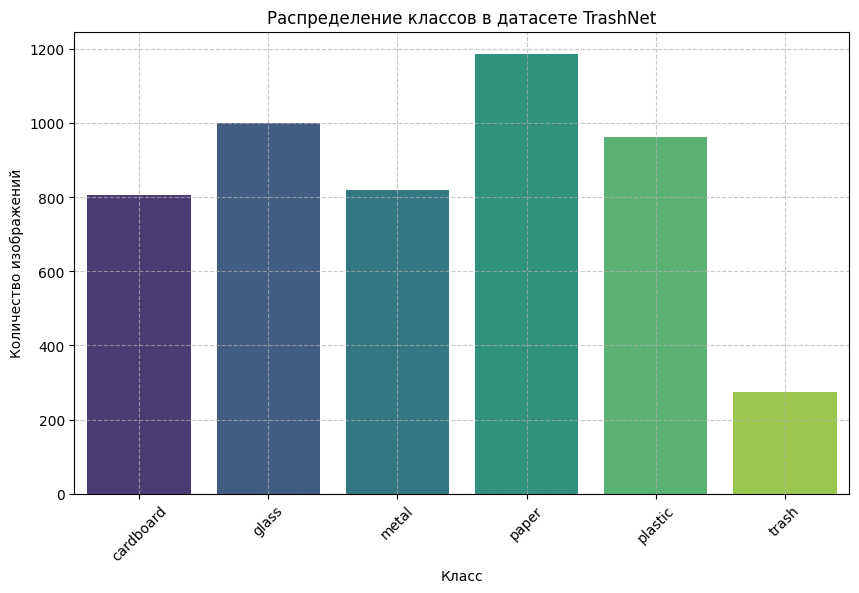

In [58]:
# Подсчет количества изображений в каждом классе
class_counts = np.bincount(ds_t['train']['label'])

# Визуализация распределения
plt.figure(figsize=(10, 6))
sns.barplot(x=class_names, y=class_counts, palette='viridis')
plt.title('Распределение классов в датасете TrashNet')
plt.xlabel('Класс')
plt.ylabel('Количество изображений')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### Вывод: Дисбаланс наблюдается и может потребоваться применение методов балансировки данных.

### 2. Оценить визуальные различия между классами. Показываем по одному примеру из каждого класса

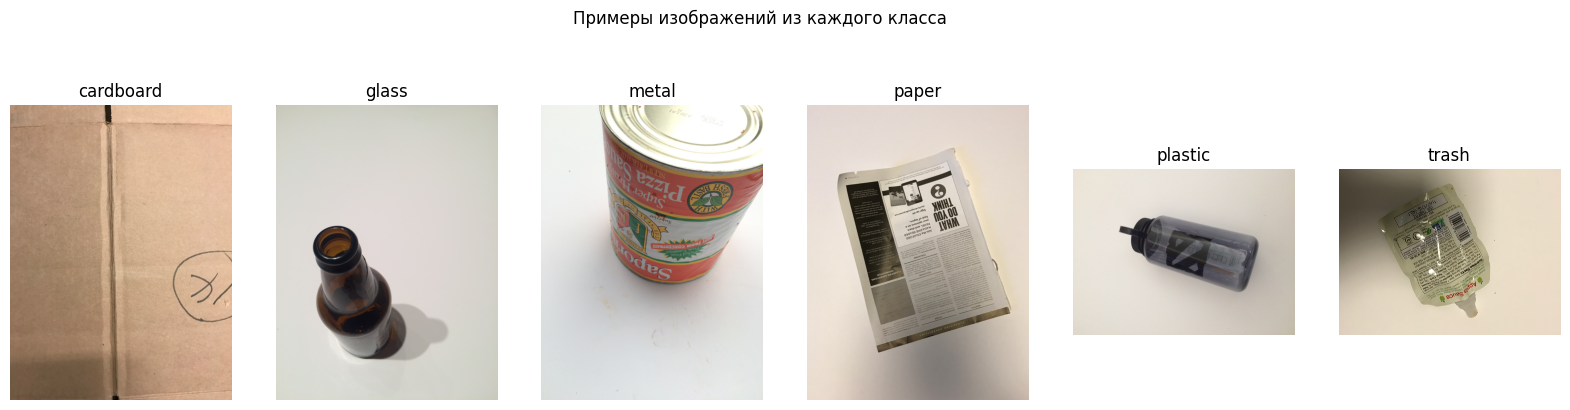

In [66]:
import matplotlib.pyplot as plt

# Список классов
class_names = ds_t['train'].features['label'].names

# Подготовим пустой список для изображений и заголовков
images_to_show = []
titles_to_show = []

# Для каждого класса выбираем одно изображение
for i, class_name in enumerate(class_names):
    # Получаем индексы всех изображений данного класса
    class_indices = [idx for idx, label in enumerate(ds_t['train']['label']) if label == i]
    
    # Если есть изображения этого класса, выбираем первое
    if class_indices:
        image_idx = class_indices[0]
        image = ds_t['train'][image_idx]['image']
        images_to_show.append(image)
        titles_to_show.append(class_name)

# Визуализируем изображения
num_images_to_show = len(images_to_show)
fig, axes = plt.subplots(1, num_images_to_show, figsize=(20, 5))

for i, ax in enumerate(axes):
    ax.imshow(images_to_show[i])
    ax.set_title(titles_to_show[i])
    ax.axis('off')

plt.suptitle('Примеры изображений из каждого класса')
plt.show()


### Вывод: классы схожи визуально, модель может испытывать трудности в их различении

### 3. Анализируем размеры изображений

Средняя ширина: 3085.92, Стандартное отклонение ширины: 585.4935640978473
Средняя высота: 3163.68, Стандартное отклонение высоты: 523.3582879825254


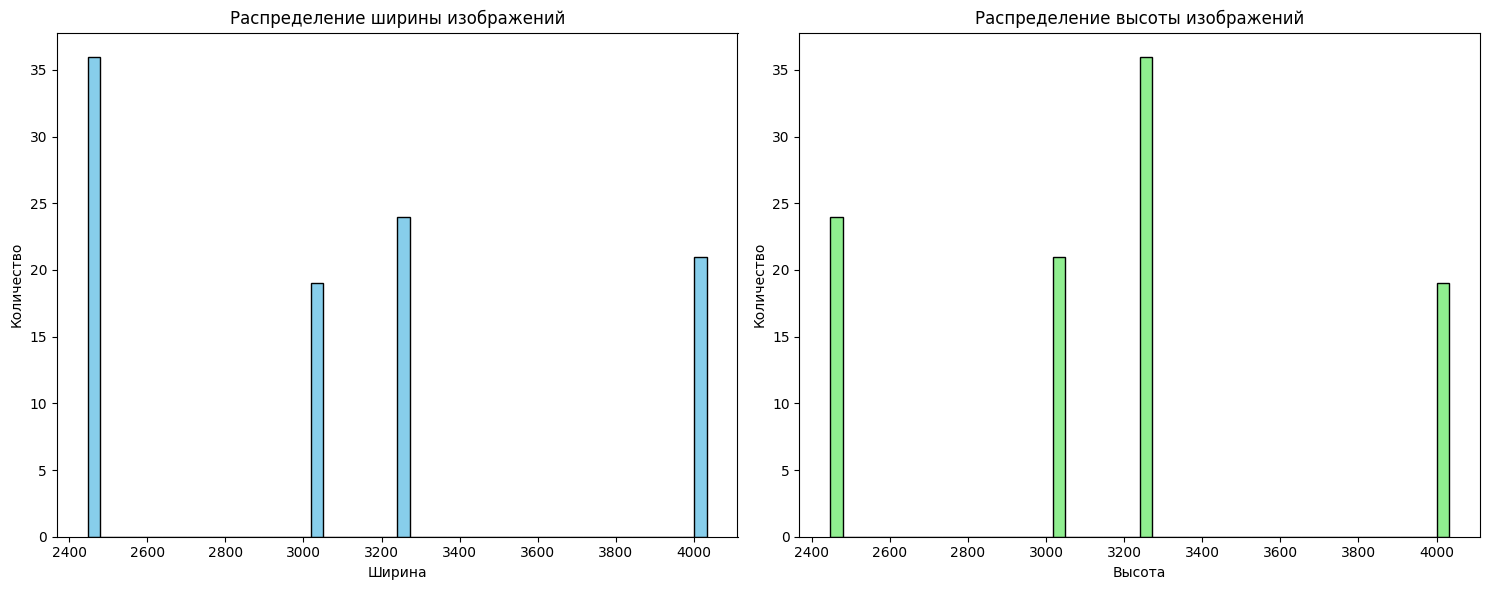

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Функция для получения размера изображения
def get_image_size(image):
    # Получаем размер изображения (ширина, высота)
    return image.size

# Загружаем первые 1000 изображений
sample_images = ds_t['train'].select(range(100))

# Получаем размеры всех изображений
image_sizes = [get_image_size(img) for img in sample_images['image']]

# Извлекаем ширину и высоту в отдельные списки
widths, heights = zip(*image_sizes)

# Рассчитываем среднее и стандартное отклонение для ширины и высоты
mean_width = np.mean(widths)
mean_height = np.mean(heights)
std_width = np.std(widths)
std_height = np.std(heights)

print(f"Средняя ширина: {mean_width}, Стандартное отклонение ширины: {std_width}")
print(f"Средняя высота: {mean_height}, Стандартное отклонение высоты: {std_height}")

# Строим гистограмму для ширины и высоты
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Гистограмма для ширины
axes[0].hist(widths, bins=50, color='skyblue', edgecolor='black')
axes[0].set_title('Распределение ширины изображений')
axes[0].set_xlabel('Ширина')
axes[0].set_ylabel('Количество')

# Гистограмма для высоты
axes[1].hist(heights, bins=50, color='lightgreen', edgecolor='black')
axes[1].set_title('Распределение высоты изображений')
axes[1].set_xlabel('Высота')
axes[1].set_ylabel('Количество')

plt.tight_layout()
plt.show()


### Вывод: Разные размеры потребуют предварительной обработки перед обучением модели

### 4. Гистограммы яркости и контраста. Чтобы понять, нужно ли делать нормализацию или аугментацию

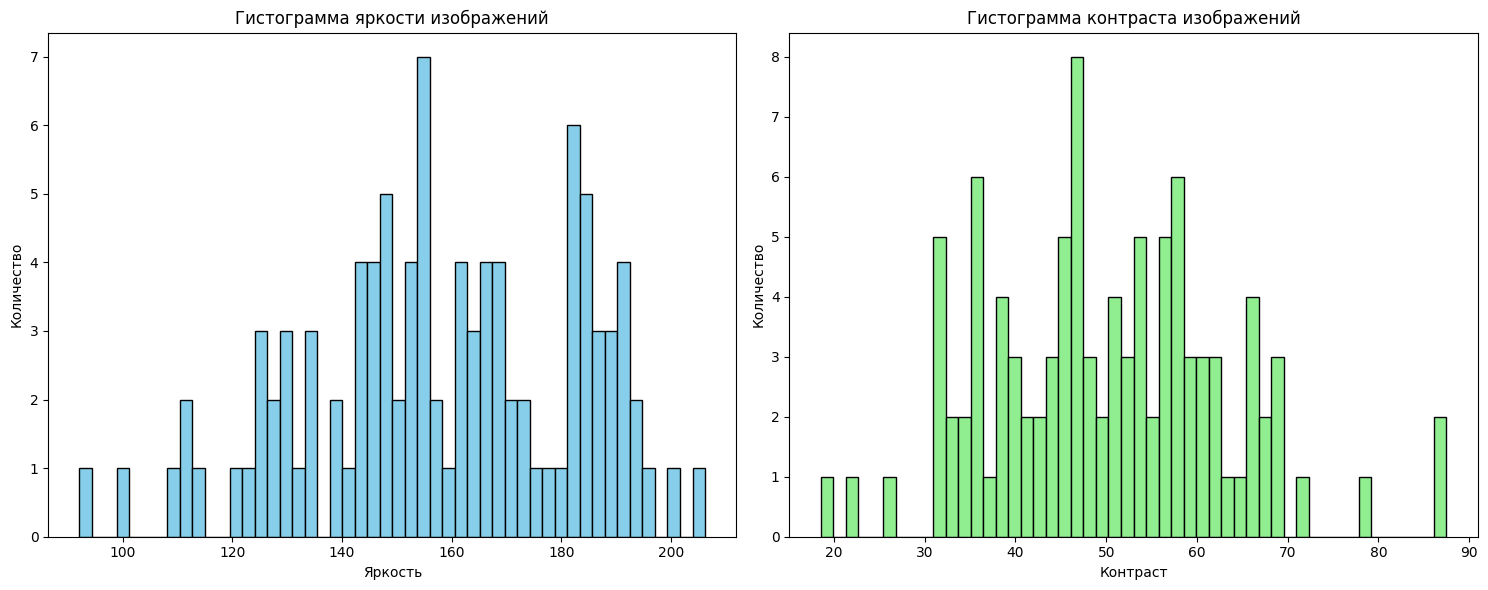

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps

# Функция для вычисления яркости изображения
def get_brightness(image):
    # Преобразуем изображение в оттенки серого (L) и вычислим среднее значение
    return np.mean(np.array(image.convert('L')))

# Функция для вычисления контраста изображения
def get_contrast(image):
    # Преобразуем изображение в оттенки серого (L) и вычислим стандартное отклонение
    return np.std(np.array(image.convert('L')))

# Загружаем первые 100 изображений для анализа
sample_images = ds_t['train'].select(range(100))

# Списки для хранения яркости и контраста
brightness = []
contrast = []

# Извлекаем яркость и контраст для каждого изображения
for img in sample_images['image']:
    brightness.append(get_brightness(img))
    contrast.append(get_contrast(img))

# Строим гистограммы для яркости и контраста
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Гистограмма для яркости
axes[0].hist(brightness, bins=50, color='skyblue', edgecolor='black')
axes[0].set_title('Гистограмма яркости изображений')
axes[0].set_xlabel('Яркость')
axes[0].set_ylabel('Количество')

# Гистограмма для контраста
axes[1].hist(contrast, bins=50, color='lightgreen', edgecolor='black')
axes[1].set_title('Гистограмма контраста изображений')
axes[1].set_xlabel('Контраст')
axes[1].set_ylabel('Количество')

plt.tight_layout()
plt.show()


### Вывод: Низкий контраст или неравномерная яркость могут ухудшить результаты модели.

### 5. Гистограммы по каналам RGB. Проверить наличие цветовых искажений.

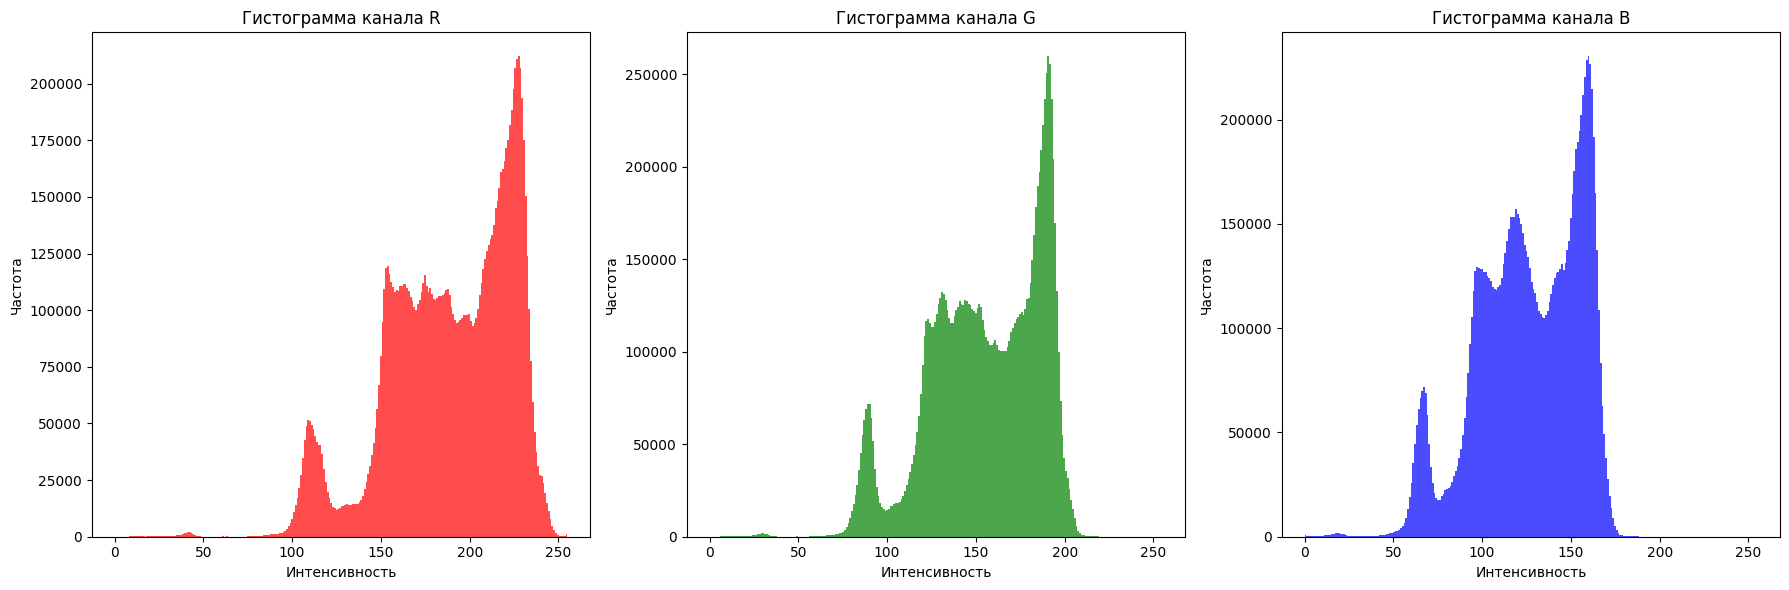

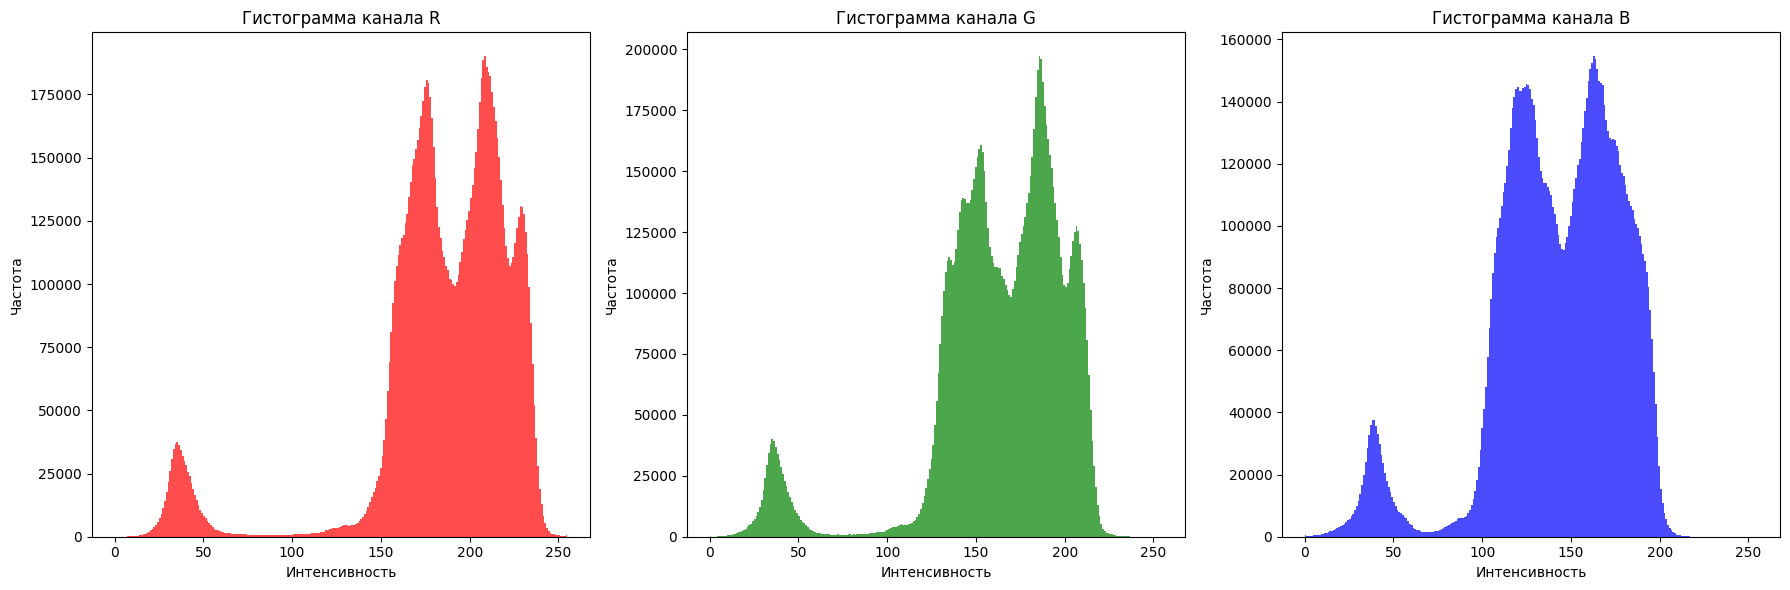

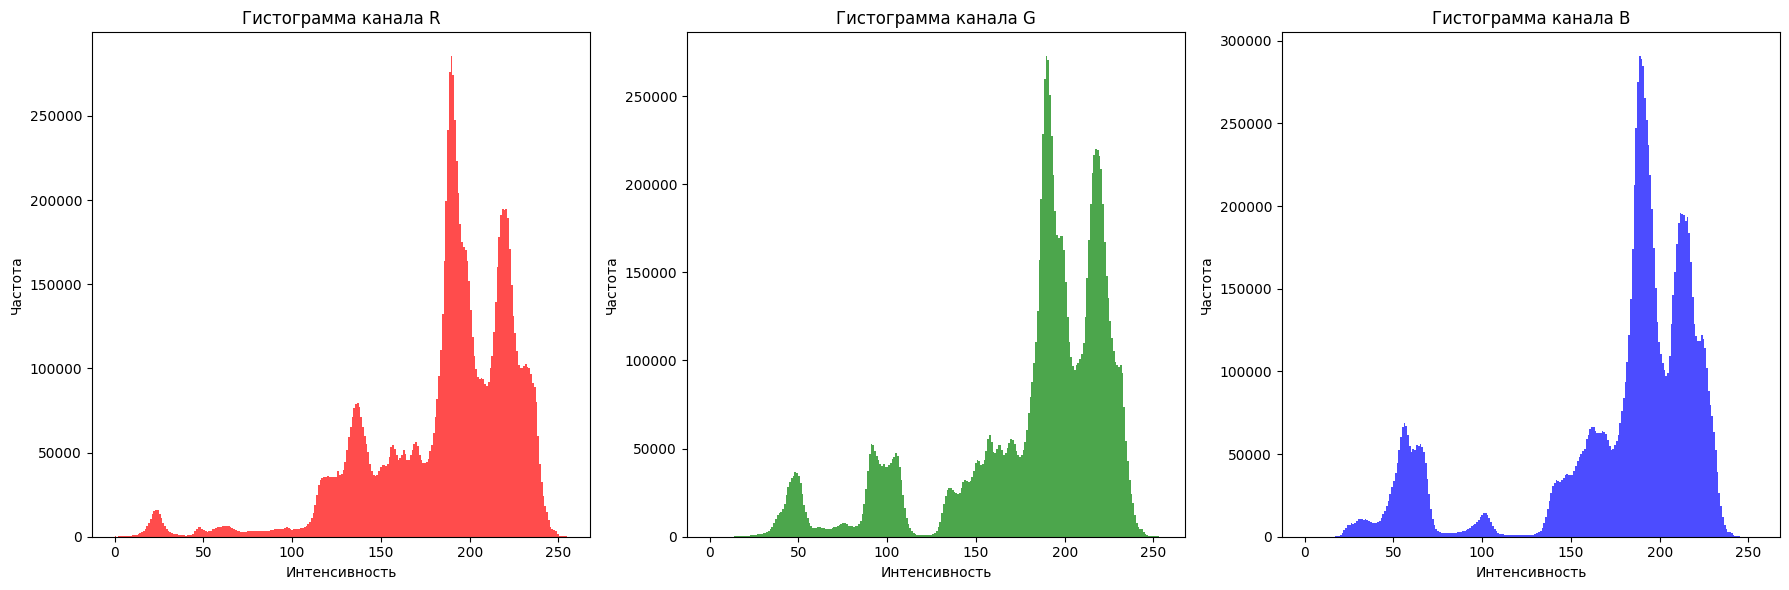

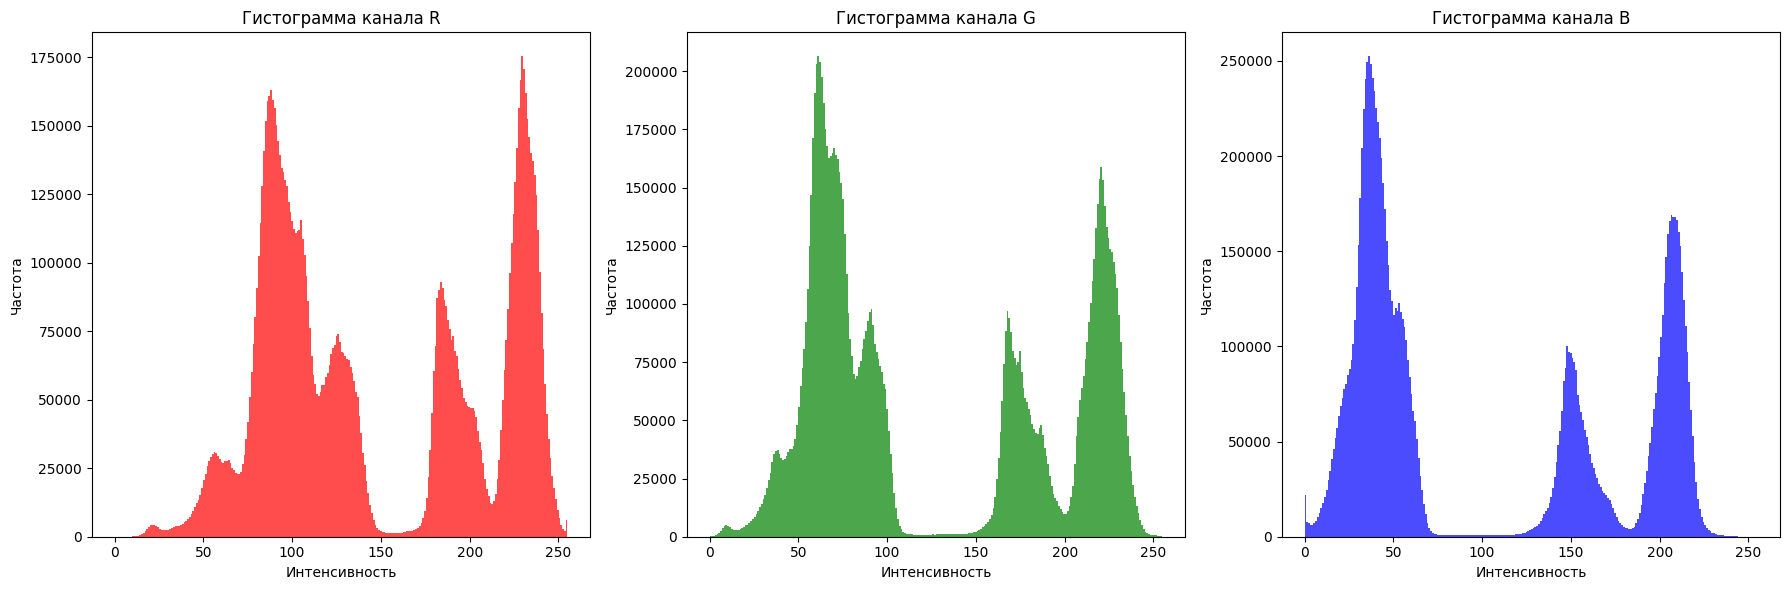

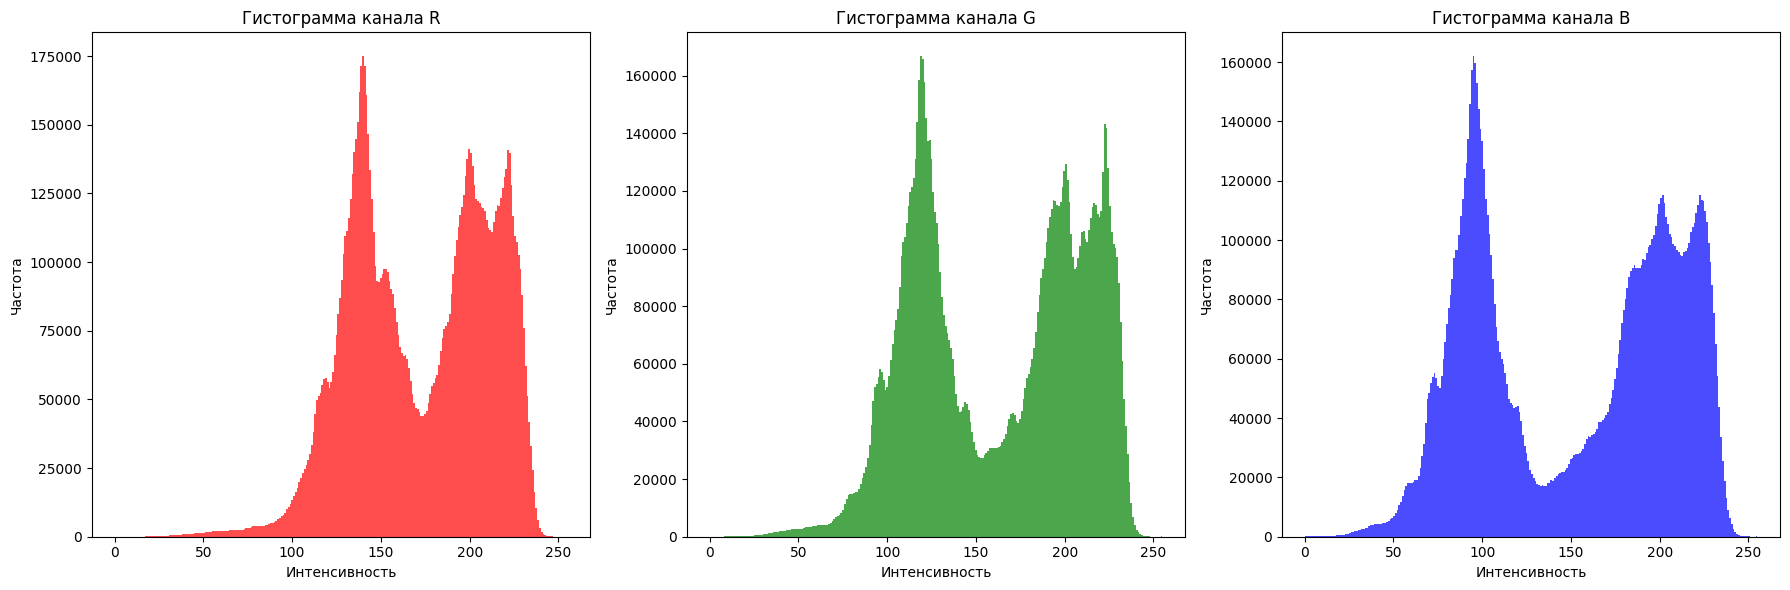

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Функция для извлечения каналов RGB и вычисления их гистограмм
def plot_rgb_histograms(image):
    # Преобразуем изображение в формат RGB
    img_rgb = image.convert('RGB')
    
    # Получаем данные для каналов R, G, B
    r, g, b = img_rgb.split()
    
    # Преобразуем каждый канал в массив numpy
    r_array = np.array(r)
    g_array = np.array(g)
    b_array = np.array(b)
    
    # Строим гистограммы для каждого канала
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
    axes[0].hist(r_array.flatten(), bins=256, color='red', alpha=0.7, range=(0, 255))
    axes[0].set_title('Гистограмма канала R')
    axes[0].set_xlabel('Интенсивность')
    axes[0].set_ylabel('Частота')

    axes[1].hist(g_array.flatten(), bins=256, color='green', alpha=0.7, range=(0, 255))
    axes[1].set_title('Гистограмма канала G')
    axes[1].set_xlabel('Интенсивность')
    axes[1].set_ylabel('Частота')

    axes[2].hist(b_array.flatten(), bins=256, color='blue', alpha=0.7, range=(0, 255))
    axes[2].set_title('Гистограмма канала B')
    axes[2].set_xlabel('Интенсивность')
    axes[2].set_ylabel('Частота')

    plt.tight_layout()
    plt.show()

# Пример: покажем гистограммы для 5 изображений из выборки
sample_images = ds_t['train'].select(range(5))

# Для каждого изображения строим гистограммы
for img in sample_images['image']:
    plot_rgb_histograms(img)


### Вывод: Если один канал доминирует, это может быть артефактом съемки.

### 6. Распределение соотношений сторон (ширина к высоте). Чтобы понять, есть ли изображения с необычными пропорциями. Это важно для предварительной обработки.

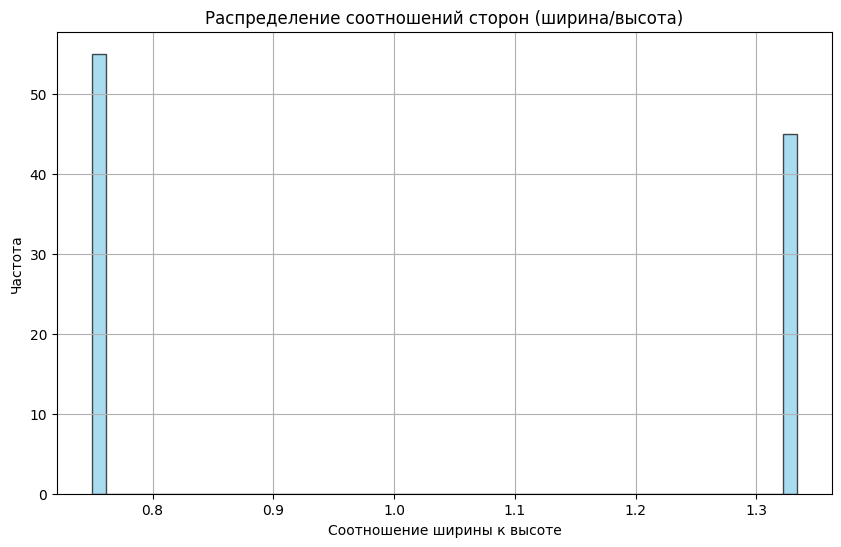

Минимальное соотношение сторон: 0.75
Максимальное соотношение сторон: 1.3333333333333333
Среднее соотношение сторон: 1.0125


In [75]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Функция для вычисления соотношения сторон
def aspect_ratio(image):
    width, height = image.size
    return width / height

# Список для хранения соотношений сторон
aspect_ratios = []

# Пример: вычисляем соотношение сторон для первых 1000 изображений
sample_images = ds_t['train'].select(range(100))

# Вычисляем соотношения сторон для каждого изображения
for img in sample_images['image']:
    aspect_ratios.append(aspect_ratio(img))

# Строим гистограмму распределения соотношений сторон
plt.figure(figsize=(10, 6))
plt.hist(aspect_ratios, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Распределение соотношений сторон (ширина/высота)')
plt.xlabel('Соотношение ширины к высоте')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

# Печатаем несколько статистик
print(f"Минимальное соотношение сторон: {min(aspect_ratios)}")
print(f"Максимальное соотношение сторон: {max(aspect_ratios)}")
print(f"Среднее соотношение сторон: {np.mean(aspect_ratios)}")


### Вывод: Если распределение сильно разнится, может потребоваться изменение пропорций (например, паддинг).

### 7. Boxplot для анализа медианы, квартилей, выбросов. Чтобы увидеть выбросы в яркости и контрасте. Это поможет в выборе техник нормализации.

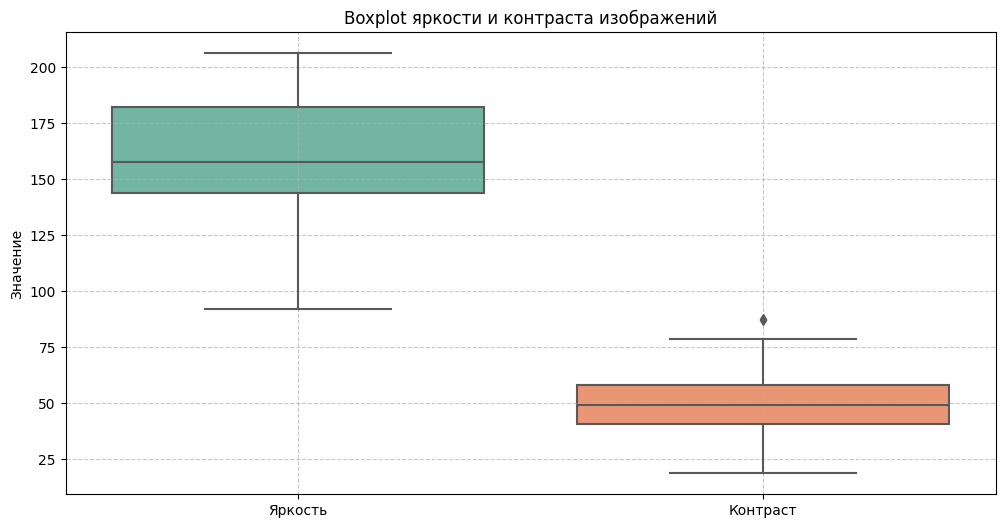

In [76]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=[brightness, contrast], palette='Set2')
plt.xticks([0, 1], ['Яркость', 'Контраст'])
plt.title('Boxplot яркости и контраста изображений')
plt.ylabel('Значение')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### Вывод: Если выбросов много, нужно будет применить clipping (обрезку значений) или другие техники нормализации.

### 8. Гистограммы текстурных характеристик, таких как энтропия. Чтобы понять, сложны ли текстуры объектов. Это важно для подбора архитектуры модели (например, сверточных слоев).

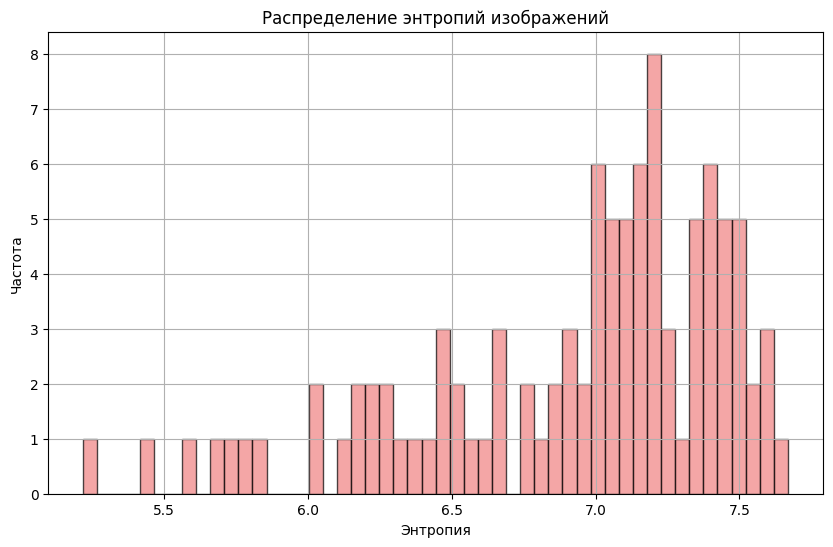

Минимальная энтропия: 5.218394438085534
Максимальная энтропия: 7.668492245571787
Средняя энтропия: 6.918846986852299


In [79]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from skimage.measure import shannon_entropy

# Функция для вычисления энтропии изображения
def get_entropy(image):
    # Преобразуем изображение в оттенки серого (если оно цветное)
    gray_image = image.convert('L')
    # Преобразуем изображение в массив
    img_array = np.array(gray_image)
    # Вычисляем энтропию изображения
    return shannon_entropy(img_array)

# Список для хранения энтропий
entropies = []

# Пример: вычисляем энтропию для первых 1000 изображений
sample_images = ds_t['train'].select(range(100))

# Вычисляем энтропию для каждого изображения
for img in sample_images['image']:
    entropies.append(get_entropy(img))

# Строим гистограмму распределения энтропий
plt.figure(figsize=(10, 6))
plt.hist(entropies, bins=50, color='lightcoral', edgecolor='black', alpha=0.7)
plt.title('Распределение энтропий изображений')
plt.xlabel('Энтропия')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

# Печатаем несколько статистик
print(f"Минимальная энтропия: {min(entropies)}")
print(f"Максимальная энтропия: {max(entropies)}")
print(f"Средняя энтропия: {np.mean(entropies)}")


### Вывод: Высокая энтропия указывает на сложные текстуры, требующие более глубоких сетей.

### 11. Диаграмма распределения доминирующих цветов. Чтобы понять, присутствуют ли характерные цветовые палитры. Это может помочь в применении цветовой нормализации.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from collections import Counter
from PIL import Image

# Функция для извлечения доминирующих цветов с помощью KMeans
def get_dominant_colors(image, n_colors=3):
    # Преобразуем изображение в массив RGB
    img_array = np.array(image.convert('RGB'))
    # Переводим изображение в двумерный массив
    pixels = img_array.reshape(-1, 3)
    
    # Применяем KMeans для нахождения доминирующих цветов
    kmeans = KMeans(n_clusters=n_colors, random_state=42)
    kmeans.fit(pixels)
    
    # Сортируем цвета по частоте их встречаемости
    counts = Counter([tuple(color) for color in kmeans.cluster_centers_.astype(int)])
    return counts

# Ограничиваем выборку до 100 изображений
sample_images = ds_t['train']['image'][:10]

# Извлекаем доминирующие цвета для первых 100 изображений
color_counts = Counter()

for img in sample_images:
    dominant_colors = get_dominant_colors(img, n_colors=3)
    color_counts.update(dominant_colors)

# Получаем список цветов и их частот
colors = list(color_counts.keys())
frequencies = list(color_counts.values())

# Создаем диаграмму распределения доминирующих цветов
plt.figure(figsize=(12, 8))

# Преобразуем цвета в формат hex для лучшей визуализации
hex_colors = ['#%02x%02x%02x' % (r, g, b) for r, g, b in colors]

# Строим столбчатую диаграмму
plt.bar(hex_colors, frequencies, color=hex_colors)
plt.xlabel('Цвета (RGB)')
plt.ylabel('Частота')
plt.title('Распределение доминирующих цветов (100 изображений)')
plt.xticks(rotation=90)
plt.show()


### Вывод: Если некоторые цвета преобладают в конкретных классах, модель может использовать их как "чит-код" для классификации.

# EDA анализ trashnet_enhanced

In [9]:
ds_t_e = load_dataset("edwinpalegre/trashnet_enhanced")

Resolving data files:   0%|          | 0/100 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/100 [00:00<?, ?it/s]

### 1. Распределение классов (гистограмма). Этот график позволяет увидеть, насколько сбалансирован или несбалансирован датасет в отношении классов. Если есть сильное преобладание одного класса, это может привести к проблемам при обучении модели (например, переобучению или игнорированию менее представленных классов).

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


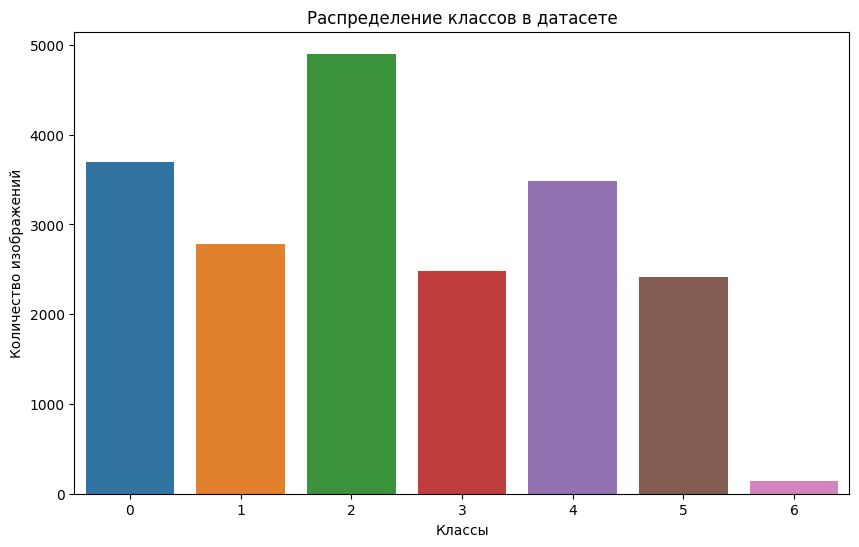

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Подсчет количества изображений для каждого класса
class_counts = ds_t_e['train']['label']
plt.figure(figsize=(10, 6))
sns.countplot(x=class_counts)
plt.title('Распределение классов в датасете')
plt.xlabel('Классы')
plt.ylabel('Количество изображений')
plt.show()


### Выводы: Если распределение классов сильно перекошено, возможно, потребуется использовать методы для борьбы с дисбалансом классов (например, аугментацию, взвешивание классов или oversampling).

### 2. Распределение размеров изображений (ширина и высота). Измерение размеров изображений помогает понять, есть ли значительное разнообразие в разрешении, что важно для решения, как будет происходить предварительная обработка изображений. Модели, как правило, требуют фиксированного размера изображений.

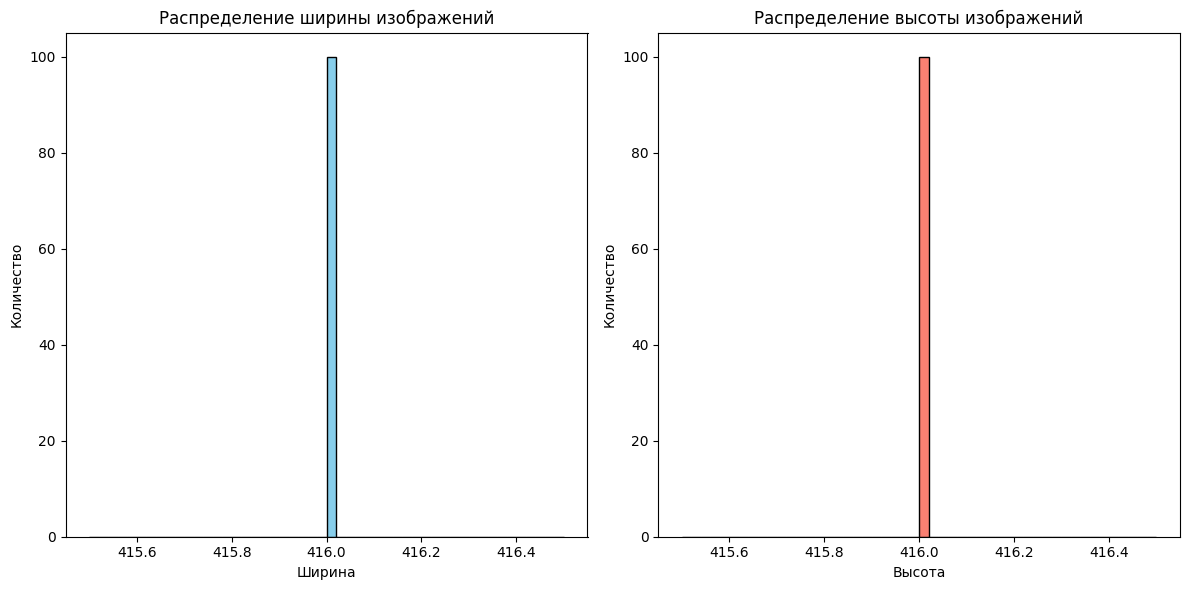

In [14]:
sample_images = ds_t_e['train'].select(range(100))
image_sizes = [img.size for img in sample_images['image']]
widths, heights = zip(*image_sizes)

# Построение гистограммы ширины и высоты
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(widths, bins=50, color='skyblue', edgecolor='black')
plt.title('Распределение ширины изображений')
plt.xlabel('Ширина')
plt.ylabel('Количество')

plt.subplot(1, 2, 2)
plt.hist(heights, bins=50, color='salmon', edgecolor='black')
plt.title('Распределение высоты изображений')
plt.xlabel('Высота')
plt.ylabel('Количество')

plt.tight_layout()
plt.show()


### Выводы: Если изображения сильно различаются по размеру, может потребоваться их обрезка или масштабирование до одного размера. Например, если в датасете есть изображения с крайне высокими или широкими пропорциями, их можно скорректировать для унификации.

### 3. Распределение соотношений сторон (ширина/высота). Это помогает понять, присутствуют ли изображения с необычными пропорциями (например, очень узкие или очень высокие). Некоторые модели, особенно сверточные нейронные сети, могут плохо работать с такими изображениями, если их не привести к единому формату.

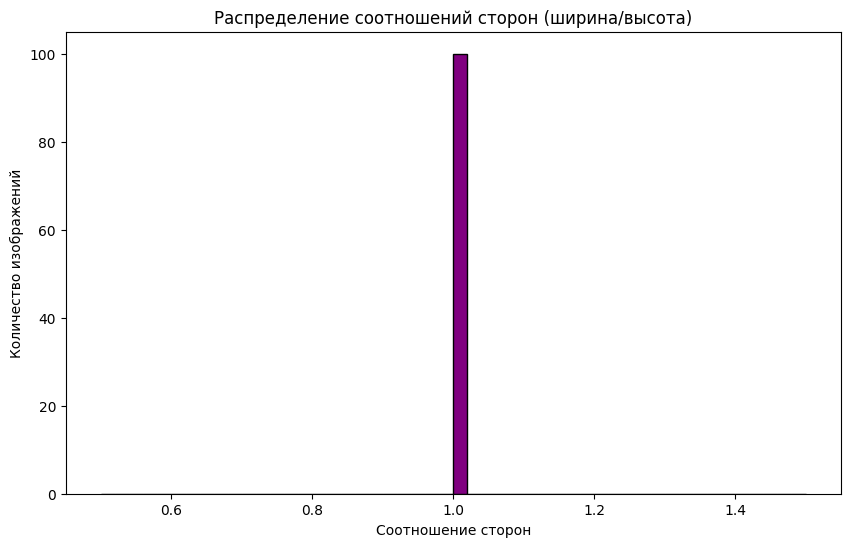

In [15]:
sample_images = ds_t_e['train'].select(range(100))
aspect_ratios = [w / h for w, h in zip(widths, heights)]
plt.figure(figsize=(10, 6))
plt.hist(aspect_ratios, bins=50, color='purple', edgecolor='black')
plt.title('Распределение соотношений сторон (ширина/высота)')
plt.xlabel('Соотношение сторон')
plt.ylabel('Количество изображений')
plt.show()                                    

### Выводы: Если встречаются изображения с необычным соотношением сторон (например, значительно больше 1 или меньше 1), возможно, потребуется их обрезка или изменение пропорций (например, в виде «padding» или растягивания).

### 4. Гистограмма яркости и контраста. Яркость и контраст — это важные характеристики, которые могут влиять на работу модели. Например, если изображения слишком темные или слишком яркие, это может усложнить задачу модели. Также важно понять, насколько изображения разнообразны по контрасту, чтобы оценить сложность распознавания.

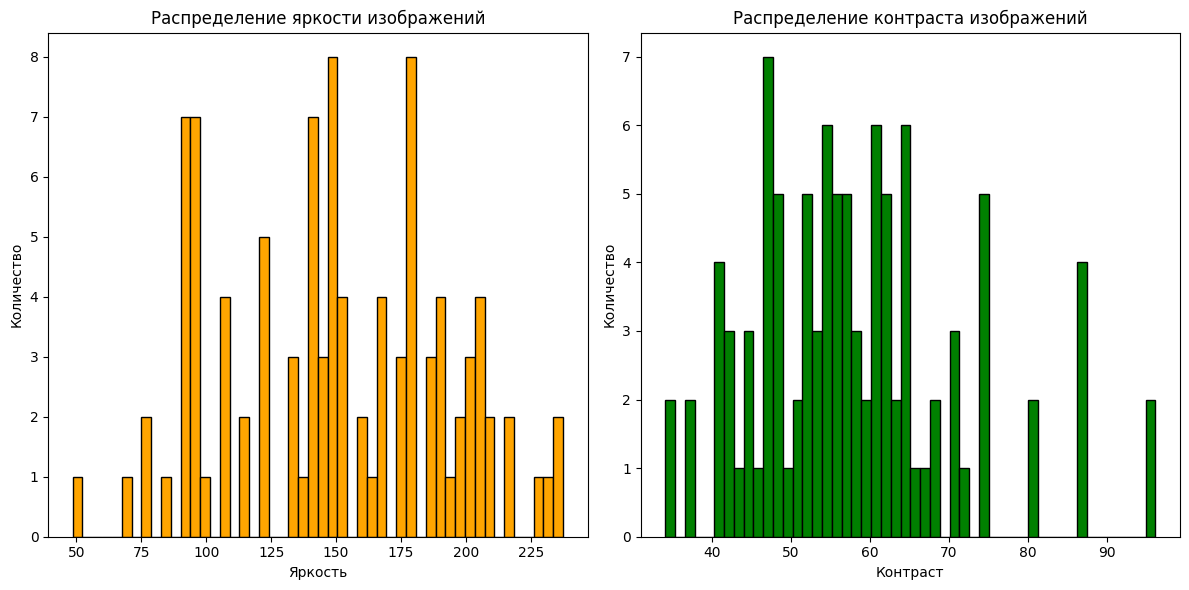

In [16]:
sample_images = ds_t_e['train'].select(range(100))
import numpy as np
from PIL import Image

def get_brightness(image):
    return np.mean(np.array(image.convert('L')))

def get_contrast(image):
    return np.std(np.array(image.convert('L')))

brightness = [get_brightness(img) for img in sample_images['image']]
contrast = [get_contrast(img) for img in sample_images['image']]

# Построение гистограммы яркости и контраста
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(brightness, bins=50, color='orange', edgecolor='black')
plt.title('Распределение яркости изображений')
plt.xlabel('Яркость')
plt.ylabel('Количество')

plt.subplot(1, 2, 2)
plt.hist(contrast, bins=50, color='green', edgecolor='black')
plt.title('Распределение контраста изображений')
plt.xlabel('Контраст')
plt.ylabel('Количество')

plt.tight_layout()
plt.show()


### Выводы: Если изображения имеют ограниченный диапазон яркости или контраста, может потребоваться нормализация или аугментация для улучшения способности модели к генерализации. Это важно для предотвращения переобучения на изображениях, имеющих только определенные визуальные характеристики.

### * 5. Гистограмма каждого канала RGB. Этот график помогает проанализировать, есть ли в датасете проблемы с цветами, такие как ярко выраженные доминирующие цвета, которые могут вызвать искажения. Это также позволяет проверить, есть ли перекос в каналах RGB, что может свидетельствовать о неправильной обработке изображений.

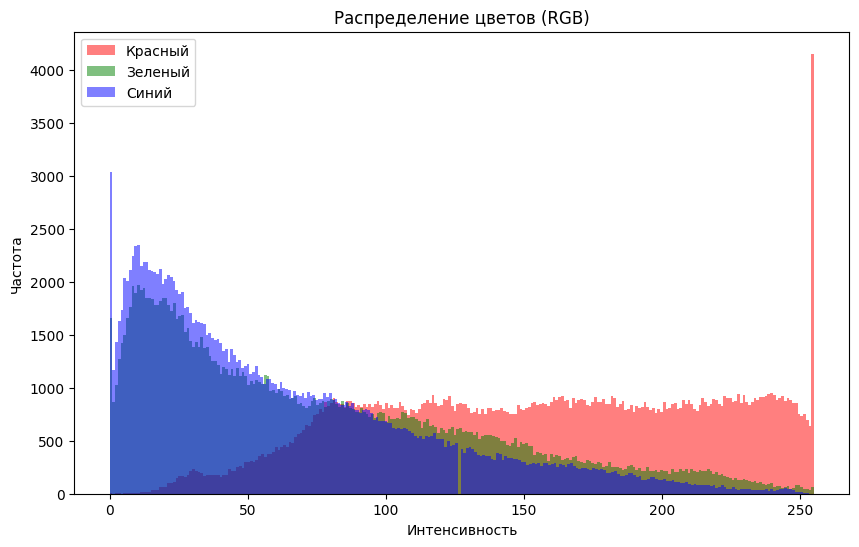

In [17]:
sample_images = ds_t_e['train'].select(range(100))
def plot_rgb_histogram(image):
    r, g, b = image.split()
    r_hist = np.array(r).flatten()
    g_hist = np.array(g).flatten()
    b_hist = np.array(b).flatten()

    plt.figure(figsize=(10, 6))
    plt.hist(r_hist, bins=256, color='red', alpha=0.5, label='Красный')
    plt.hist(g_hist, bins=256, color='green', alpha=0.5, label='Зеленый')
    plt.hist(b_hist, bins=256, color='blue', alpha=0.5, label='Синий')
    plt.title('Распределение цветов (RGB)')
    plt.xlabel('Интенсивность')
    plt.ylabel('Частота')
    plt.legend()
    plt.show()

# Для одного изображения из выборки
plot_rgb_histogram(sample_images['image'][0])


### Выводы: Если один из каналов (например, красный или синий) значительно преобладает в большинстве изображений, это может требовать коррекции, например, через нормализацию или аугментацию. Также могут понадобиться дополнительные методы коррекции цвета, если изображения слишком темные или имеют перекос по оттенкам.

### 6. t-SNE для визуализации признаков (яркость, контраст, размеры). t-SNE — это метод для снижения размерности, который помогает визуализировать высокоразмерные данные в двумерном пространстве. Это полезно для понимания того, как данные группируются в пространстве признаков.

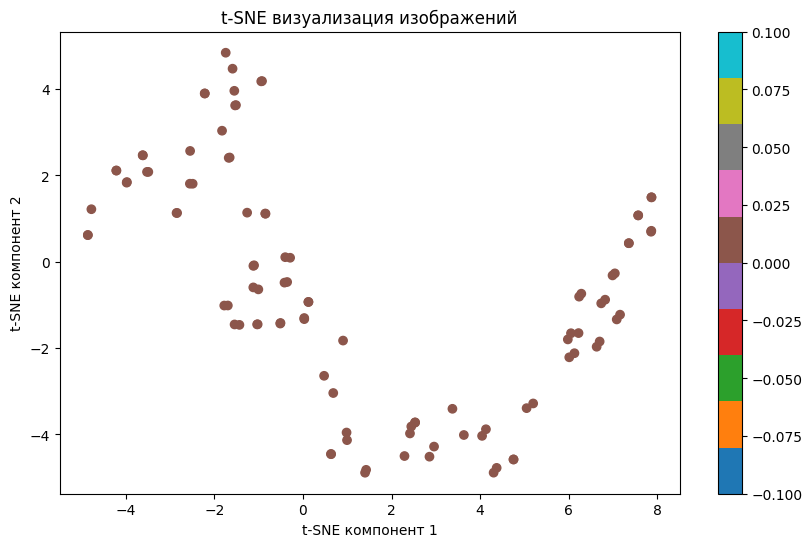

In [18]:
sample_images = ds_t_e['train'].select(range(100))
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Извлекаем признаки: яркость, контраст, ширина и высота
features = np.array(list(zip(brightness, contrast, widths, heights)))
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Применяем t-SNE для снижения размерности
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(scaled_features)

# Визуализация на t-SNE
plt.figure(figsize=(10, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=sample_images['label'], cmap='tab10')
plt.title('t-SNE визуализация изображений')
plt.xlabel('t-SNE компонент 1')
plt.ylabel('t-SNE компонент 2')
plt.colorbar()
plt.show()


### Выводы: Если данные хорошо разделены на кластеры, это может свидетельствовать о четкой границе между классами. Если они смешаны, возможно, стоит применить дополнительные методы для выделения признаков или использовать более сложные архитектуры моделей. t-SNE может помочь в выявлении корреляций между признаками, которые трудно увидеть в высокоразмерном пространстве.